In [ ]:
# Run this once
!pip install openpyxl


In [ ]:
import pandas as pd

# Replace the name below with the exact uploaded filename if different
filename = "Data_Professional_Survey_Dataset.xlsx"

df = pd.read_excel(filename)
print("Rows, Columns:", df.shape)
print("\nPreview (first 7 rows):")
display(df.head(7))


Rows, Columns: (400, 6)

Preview (first 7 rows):


,Job Title,Salary,Years of Experience,Country,Favorite Tool,Happiness Score
0,Data Analyst,150140,16,Singapore,R,4
1,Data Analyst,113074,4,Australia,Tableau,3
2,Data Analyst,153539,4,India,Python,7
3,Data Scientist,52634,5,Australia,R,6
4,Data Engineer,175095,16,Canada,Power BI,9
5,Data Scientist,99474,9,India,Tableau,3
6,Data Engineer,176168,1,USA,SAS,3


In [ ]:
# Quick info
print("Columns and types:\n")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nUnique values (sample) for important columns:")
for col in ['Job Title','Country','Favorite Tool'] :
    if col in df.columns:
        print(f"\n{col} unique sample:", df[col].unique()[:10])


Columns and types:

Job Title              object
Salary                  int64
Years of Experience     int64
Country                object
Favorite Tool          object
Happiness Score         int64
dtype: object

Missing values per column:
Job Title              0
Salary                 0
Years of Experience    0
Country                0
Favorite Tool          0
Happiness Score        0
dtype: int64

Unique values (sample) for important columns:

Job Title unique sample: ['Data Analyst' 'Data Scientist' 'Data Engineer' 'Data Architect'
 'Business Analyst' 'ML Engineer' 'AI Engineer']

Country unique sample: ['Singapore' 'Australia' 'India' 'Canada' 'USA' 'Germany' 'UK']

Favorite Tool unique sample: ['R' 'Tableau' 'Python' 'Power BI' 'SAS' 'SQL' 'Excel']


In [ ]:
# Copy original
cleaned_df = df.copy()

# 1) Standardize column names (strip spaces)
cleaned_df.columns = [c.strip() for c in cleaned_df.columns]

# 2) Drop rows that are fully empty
cleaned_df = cleaned_df.dropna(how='all')

# 3) Trim whitespace in string columns (if any)
for c in cleaned_df.select_dtypes(include=['object']).columns:
    cleaned_df[c] = cleaned_df[c].astype(str).str.strip()

# 4) Convert Salary -> numeric (remove commas, currency symbols if present)
def to_numeric_salary(x):
    try:
        s = str(x).replace(',', '').replace('$','').strip()
        return float(s)
    except:
        return pd.NA

if 'Salary' in cleaned_df.columns:
    cleaned_df['Salary'] = cleaned_df['Salary'].apply(to_numeric_salary)

# 5) Convert Years of Experience to numeric (may have text like "5 years")
def to_numeric_exp(x):
    try:
        s = str(x).lower().replace('years','').replace('year','').replace('yrs','').replace('yrs.','').strip()
        return float(s)
    except:
        return pd.NA

if 'Years of Experience' in cleaned_df.columns:
    cleaned_df['Years of Experience'] = cleaned_df['Years of Experience'].apply(to_numeric_exp)

# 6) Drop rows where Salary or Experience is missing (you may choose drop only salary)
cleaned_df = cleaned_df.dropna(subset=['Salary'])

# 7) Remove unrealistic salaries (tweak thresholds if your dataset uses different currency)
cleaned_df = cleaned_df[(cleaned_df['Salary'] >= 20000) & (cleaned_df['Salary'] <= 2000000)]

# 8) Convert numeric columns to proper dtype
cleaned_df['Salary'] = cleaned_df['Salary'].astype(float)
if 'Years of Experience' in cleaned_df.columns:
    cleaned_df['Years of Experience'] = cleaned_df['Years of Experience'].fillna(0).astype(int)

print("After cleaning, rows:", cleaned_df.shape[0])
display(cleaned_df.head(5))


After cleaning, rows: 400


,Job Title,Salary,Years of Experience,Country,Favorite Tool,Happiness Score
0,Data Analyst,150140.0,16,Singapore,R,4
1,Data Analyst,113074.0,4,Australia,Tableau,3
2,Data Analyst,153539.0,4,India,Python,7
3,Data Scientist,52634.0,5,Australia,R,6
4,Data Engineer,175095.0,16,Canada,Power BI,9


In [ ]:
cleaned_csv = "Cleaned_Survey_Data.csv"
cleaned_xlsx = "Cleaned_Survey_Data.xlsx"

cleaned_df.to_csv(cleaned_csv, index=False)
cleaned_df.to_excel(cleaned_xlsx, index=False)

print("Saved:", cleaned_csv, ",", cleaned_xlsx)

# Provide download links in Colab
from google.colab import files
files.download(cleaned_csv)   # will trigger browser download
# If you want the xlsx too, uncomment the next line
files.download(cleaned_xlsx)


Saved: Cleaned_Survey_Data.csv , Cleaned_Survey_Data.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("TOTAL RESPONDENTS (after cleaning):", len(cleaned_df))

# Average salary overall
avg_salary = cleaned_df['Salary'].mean()
print("Average Salary:", round(avg_salary, 2))

# Average salary by Job Title
if 'Job Title' in cleaned_df.columns:
    avg_by_job = cleaned_df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False)
    print("\nAverage Salary by Job Role:")
    print(avg_by_job.round(2))

# Most popular tools
if 'Favorite Tool' in cleaned_df.columns:
    tools_count = cleaned_df['Favorite Tool'].value_counts()
    print("\nFavorite Tools (top):")
    print(tools_count.head(10))

# Country wise average salary
if 'Country' in cleaned_df.columns:
    country_salary = cleaned_df.groupby('Country')['Salary'].mean().sort_values(ascending=False)
    print("\nAverage Salary by Country:")
    print(country_salary.round(2))


TOTAL RESPONDENTS (after cleaning): 400
Average Salary: 110973.98

Average Salary by Job Role:
Job Title
AI Engineer         115584.36
Data Analyst        114396.21
Data Scientist      113302.98
Data Engineer       112087.63
Data Architect      111216.02
Business Analyst    106137.68
ML Engineer         103289.96
Name: Salary, dtype: float64

Favorite Tools (top):
Favorite Tool
Tableau     68
Python      64
Power BI    64
R           58
SAS         50
SQL         48
Excel       48
Name: count, dtype: int64

Average Salary by Country:
Country
Germany      117195.88
USA          115251.30
Australia    114138.93
Singapore    111638.55
India        109818.12
Canada       107768.72
UK           102200.62
Name: Salary, dtype: float64


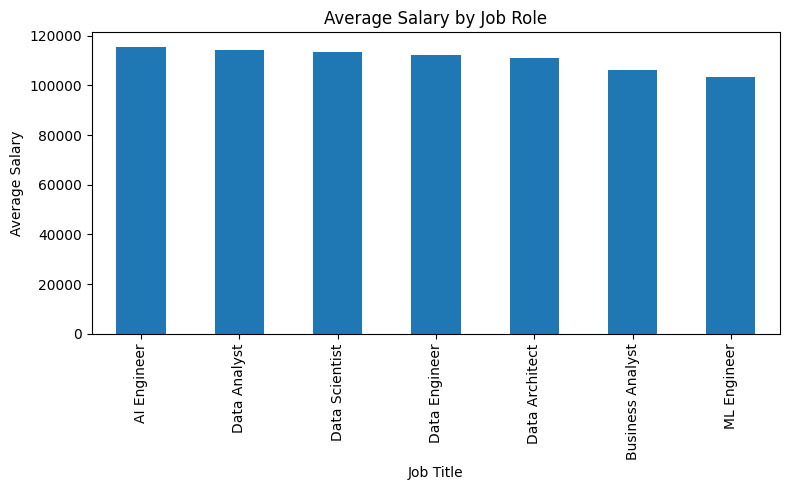

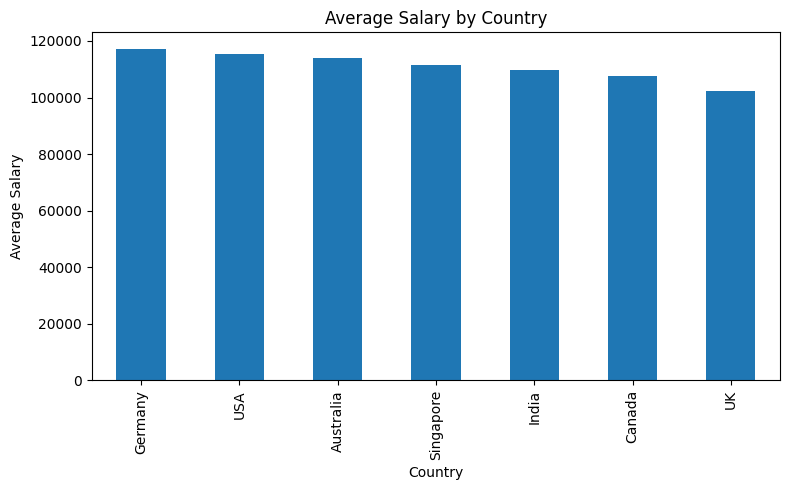

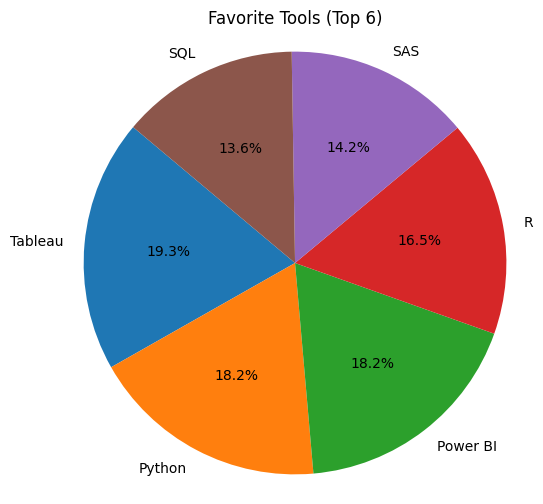

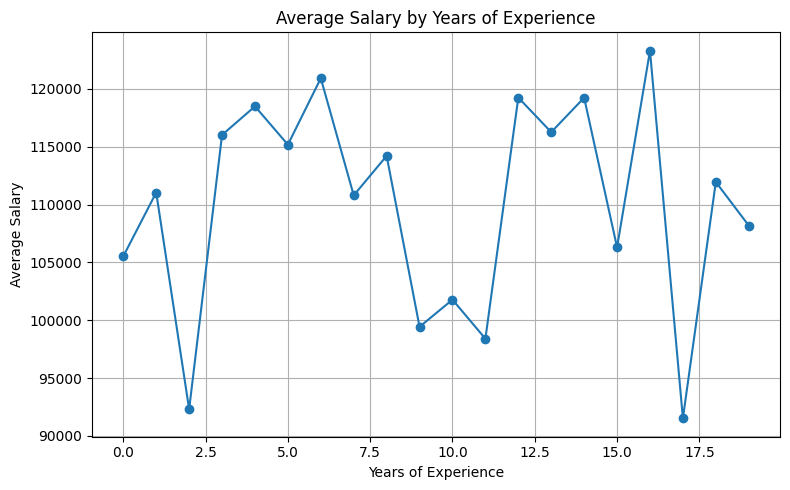

In [ ]:
import matplotlib.pyplot as plt

# 1) Bar chart: Average salary by Job Role (top 10)
plt.figure(figsize=(8,5))
avg_by_job.plot(kind='bar')
plt.title("Average Salary by Job Role")
plt.ylabel("Average Salary")
plt.tight_layout()
plt.show()

# 2) Bar chart: Average salary by Country (top 10)
plt.figure(figsize=(8,5))
country_salary.plot(kind='bar')
plt.title("Average Salary by Country")
plt.ylabel("Average Salary")
plt.tight_layout()
plt.show()

# 3) Favorite tools pie (top 6)
top_tools = tools_count.head(6)
plt.figure(figsize=(6,6))
plt.pie(top_tools, labels=top_tools.index, autopct='%1.1f%%', startangle=140)
plt.title("Favorite Tools (Top 6)")
plt.axis('equal')
plt.show()

# 4) Salary vs Experience (average salary by experience years)
if 'Years of Experience' in cleaned_df.columns:
    salary_by_exp = cleaned_df.groupby('Years of Experience')['Salary'].mean()
    plt.figure(figsize=(8,5))
    salary_by_exp.plot(kind='line', marker='o')
    plt.title("Average Salary by Years of Experience")
    plt.xlabel("Years of Experience")
    plt.ylabel("Average Salary")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Saved avg_salary_by_job.png


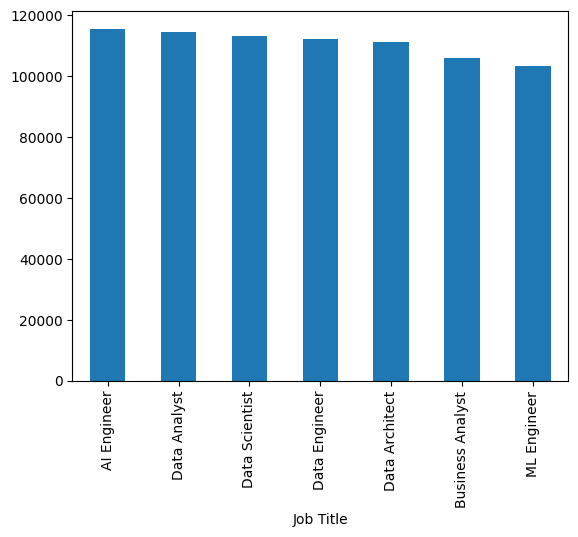

In [ ]:
# Example: save the salary by job bar chart as PNG
fig = avg_by_job.plot(kind='bar').get_figure()
fig.savefig("avg_salary_by_job.png", bbox_inches='tight')
print("Saved avg_salary_by_job.png")


In [ ]:
resume_line_1 = "Data Professional Survey Analysis"
resume_line_2 = "- Cleaned and analyzed survey data using Pandas; created visual insights on salary, experience, and tool usage."

project_paragraph = (
    "Performed data cleaning and exploratory analysis on a 400-row survey of data professionals using Python (Pandas). "
    "Analyzed salary distribution, job role comparisons, country-level pay differences, and tool popularity. "
    "Saved the cleaned dataset for visualization and built charts to support findings for a Power BI dashboard."
)

print(resume_line_1)
print(resume_line_2)
print("\nProject description (copy for report):\n")
print(project_paragraph)


Data Professional Survey Analysis
- Cleaned and analyzed survey data using Pandas; created visual insights on salary, experience, and tool usage.

Project description (copy for report):

Performed data cleaning and exploratory analysis on a 400-row survey of data professionals using Python (Pandas). Analyzed salary distribution, job role comparisons, country-level pay differences, and tool popularity. Saved the cleaned dataset for visualization and built charts to support findings for a Power BI dashboard.
